In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [3]:
def prob_00(S,pix,piy,qx,qy,l):
    rx, ry = 1/qx, 1/qy
    sum1 = 0
    for b in range(1,S+1):
        prod = 1
        for j in range(0,b):
            prod = prod * (S-j)/(j+1)*((1-l)*piy + l*j/(S-1))/ry
        sum1 += prod
    sum2 = 0
    for a in range(1,S+1):
        prod = 1
        for j in range(a):
            prod = prod * (S-j)/(j+1)*((1-l)*pix + l*j/(S-1))/rx
        sum3 = 0
        for b in range(S-a+1):
            prod1 = 1
            for k in range(b):
                prod1 = prod1 * ((S-a-k)*((S-1)*(1-l)*piy + l*k))/((k+1)*((S-1)*ry + a))
            sum3 += prod1
        sum2 += prod * (1 + sum3)
    return 1/(1 + sum1 + sum2)
            

def prob_ab(a,b,S,p00,pix,piy,qx,qy,l):
    # a,b populations in states x,y (or 1,2); S total system size
    rx, ry = 1/qx, 1/qy
    # numerador
    prod1, prod2 = 1, 1
    for j in range(a): # so j 0...a-1
        prod1 = prod1*(S-j)/(j+1)*((1-l)*pix + l*j/(S-1))/rx
    for j in range(b): # so j 0...b-1
        prod2 = prod2*(S-a-j)/(j+1)*((S-1)*(1-l)*piy + l*j)/(ry*(S-1) + a)
    return p00*prod1*prod2
    # return prod1*prod2

In [ ]:
# LES model with T equations

def Tab_plusx(a,b,S,pix,l):
    return (S-a-b)*((1-l)*pix + l*a/(S-1))

def Tab_plusy(a,b,S,piy,l):
    return (S-a-b)*((1-l)*piy + l*b/(S-1))

def Tab_minx(a,b,S,rx):
    return a*(rx + b/(S-1))

def Tab_miny(a,b,S,ry):
    return b*(ry + a/(S-1))

def prob_00_v2(S,pix,piy,qx,qy,l):
    rx, ry = 1/qx, 1/qy
    sum1 = 0
    for b in range(1,S+1):
        prod = 1
        for j in range(0,b):
            prod = prod * Tab_plusy(0,j,S,piy,l)/Tab_miny(0,j+1,S,ry)
        sum1 = sum1 + prod
    return sum1

In [5]:
# Reina's noise type 1

def Tab_plusx_Rn1(a,b,S,qx,sigma):
    return (S-a-b)*(qx*a/(S-1) + sigma)

def Tab_plusy_Rn1(a,b,S,qy,sigma):
    return (S-a-b)*(qy*b/(S-1) + sigma)

def Tab_minx_Rn1(a,b,S,qy,sigma):
    return a*(sigma + qy*b/(S-1))

def Tab_miny_Rn1(a,b,S,qx,sigma):
    return b*(sigma + qx*a/(S-1))

def prob_00_Rn1(S,qx,qy,sigma):
    sum1 = 0
    for b in range(1,S+1):
        prod = 1
        for j in range(0,b):
            prod = prod * Tab_plusy_Rn1(0,j,S,qy,sigma)/Tab_miny_Rn1(0,j+1,S,qx,sigma)
        sum1 = sum1 + prod
    sum2 = 0
    for a in range(1,S+1):
        prod = 1
        for j in range(a):
            prod = prod * Tab_plusx_Rn1(j,0,S,qx,sigma)/Tab_minx_Rn1(j+1,0,S,qy,sigma)
        sum3 = 0
        for b in range(S-a+1):
            prod1 = 1
            for k in range(b):
                prod1 = prod1 * Tab_plusy_Rn1(a,k,S,qy,sigma)/Tab_miny_Rn1(a,k+1,S,qx,sigma)
            sum3 += prod1
        sum2 += prod * (1 + sum3)
    return 1/(1 + sum1 + sum2)

def prob_ab_Rn1(a,b,S,p00,qx,qy,sigma):
    prod1, prod2 = 1, 1
    for j in range(a):
        prod1 = prod1*Tab_plusx_Rn1(j,0,S,qx,sigma)/Tab_minx_Rn1(j+1,0,S,qy,sigma)
    for j in range(b):
        prod2 = prod2*Tab_plusy_Rn1(a,j,S,qy,sigma)/Tab_miny_Rn1(a,j+1,S,qx,sigma)
    return p00*prod1*prod2
    # return prod1*prod2

In [27]:
pis, qs, l = [0.1, 0.1], [9.0, 10.0], 0.6
S = 100
p00 = prob_00(S, *pis, *qs, l)
# fixed point:
fxp = [0.16648640741807813, 0.007958484989059489, 0.8255551075937357]
a,b = int(S*fxp[1]), int(S*fxp[2])
pab = prob_ab(a,b, S, p00, *pis, *qs, l)
print(f'Prob in a fixed point with {a}, {b}: {pab}')

fxp = [0.18540249757173186, 0.8052575146285746, 0.009339987799526717]
a,b = int(S*fxp[1]), int(S*fxp[2])
pab = prob_ab(a,b, S, p00, *pis, *qs, l)
print(f'Prob in a fixed point with {a}, {b}: {pab}')

fxp = [0.4826058780233375, 0.2665076242188334, 0.25088649775841443]
a,b = int(S*fxp[1]), int(S*fxp[2])
pab = prob_ab(a,b, S, p00, *pis, *qs, l)
print(f'Prob in a fixed point with {a}, {b}: {pab}')

pab = prob_ab(20, 20, S, p00, *pis, *qs, l)
print('Prob further from fxp: ', pab)

Prob in a fixed point with 0, 82: 0.0771024027954571
Prob in a fixed point with 80, 0: 1.0566467765889155e-05
Prob in a fixed point with 26, 25: 1.9419615484716407e-05
Prob further from fxp:  1.3359933809677643e-13


In [80]:
S, dS = 500, 1
Npoints = int(S/dS) + 1
xgrid, ygrid = np.mgrid[0:S:complex(0,Npoints), 0:S:complex(0,Npoints)]
probGrid = np.empty([Npoints, Npoints])

pis, qs, l = [0.1, 0.1], [9.0, 10.0], 0.6
p00 = prob_00(S, *pis, *qs, l)

for i,x in enumerate(xgrid[:,0]):
    for j,y in enumerate(ygrid[0,:]):
        if x+y<=S:
            probGrid[i,j] = prob_ab(int(x),int(y),S,p00, *pis, *qs, l)
        else:
            # probGrid[i,j] = float('nan')
            probGrid[i,j] = np.nan

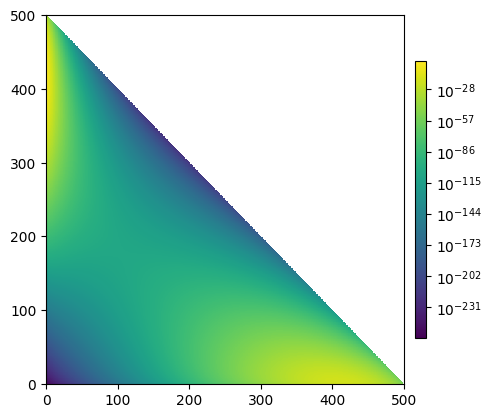

In [81]:
fig, ax = plt.subplots(figsize=(5.6,4.8))
vmin, vmax = min(probGrid[xgrid+ygrid<=S]), max(probGrid[xgrid+ygrid<=S])
# vmin = 1e-10
im = ax.pcolormesh(xgrid, ygrid, probGrid, cmap='viridis', shading='nearest', norm = LogNorm(vmin=vmin, vmax=vmax))
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)

In [8]:
# probGrid = probGrid[xgrid+ygrid<=S]

# prob1 = sum(probGrid[~np.isnan(probGrid)])
prob1 = sum(probGrid[xgrid+ygrid<=S])
prob11 = sum(probGrid[~np.isnan(probGrid)])
print(prob1, prob11)

probyArray = np.array(probGrid[ygrid > xgrid], dtype=np.float64)
proby = sum(probyArray[~np.isnan(probyArray)])
print(proby/prob1)

probxArray = np.array(probGrid[xgrid > ygrid], dtype=np.float64)
probx = sum(probxArray[~np.isnan(probxArray)])
print(probx/prob1)

0.7818338654258209 0.7818338654258209
0.27950064296499705
0.7204993570350041


In [6]:
# Reina's
S, dS = 100, 1
Npoints = int(S/dS) + 1
xgrid, ygrid = np.mgrid[0:S:complex(0,Npoints), 0:S:complex(0,Npoints)]
probGrid = np.empty([Npoints, Npoints])

qs, sigma = [1.0, 1.0], 0.1
p00 = prob_00_Rn1(S, *qs, sigma)

for ik,x in enumerate(xgrid[:,0]):
    for jk,y in enumerate(ygrid[0,:]):
        if x+y<=S:
            probGrid[ik,jk] = prob_ab_Rn1(int(x),int(y),S,p00, *qs, sigma)
        else:
            # probGrid[i,j] = float('nan')
            probGrid[ik,jk] = np.nan

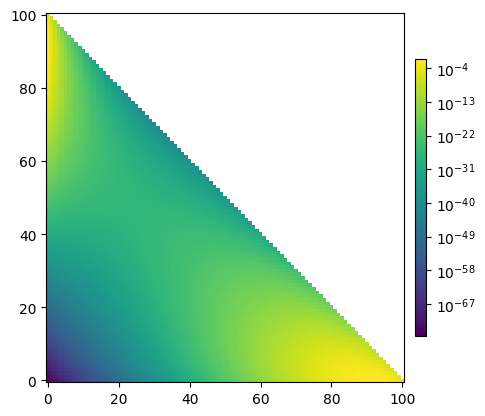

In [7]:
fig, ax = plt.subplots(figsize=(5.6,4.8))
vmin, vmax = min(probGrid[xgrid+ygrid<=S]), max(probGrid[xgrid+ygrid<=S])
# vmin = 1e-10
# print(vmin, vmax)
im = ax.pcolormesh(xgrid, ygrid, probGrid, cmap='viridis', shading='nearest', norm = LogNorm(vmin=vmin, vmax=vmax))
cb = fig.colorbar(im, ax=ax, aspect=25, shrink=0.75, pad=0.025)

In [1]:
from mpltern.datasets import get_triangular_grid
f0, f1 , f2 = get_triangular_grid(32)

In [28]:
qx, qy = 1.0, 1.05
prob_ab_Rn1(0,80,S,p00,qx,qy,sigma)

1.7284360275080065e+73

In [73]:
prob1 = sum(probGrid[xgrid+ygrid<=S])
p00 = prob_00_Rn1(S, *qs, sigma)

print(1/prob1, p00)

3.830596979009726e-76 2.994890442987648e-76


### prob x-y=k

In [18]:
S = 100
qs, sigma = [1.0, 1.0], 0.055
p00 = prob_00_Rn1(S, *qs, sigma)

difs_probs = {}
for dif in range(S+1):
    # when a>=b:
    pairs_ab = [(a,a-dif) for a in range(dif,int((S+dif)/2)+1)]
    sum_same_dif = 0
    for a,b in pairs_ab:
        pab = prob_ab_Rn1(a,b,S,p00,*qs,sigma)
        sum_same_dif += pab
    difs_probs[dif] = sum_same_dif
    # when b>a:
    if dif >=1:
        invdif = -dif
        sum_same_dif = 0
        for a,b in pairs_ab:
            pba = prob_ab_Rn1(b,a,S,p00,*qs,sigma)
            sum_same_dif += pba
        difs_probs[invdif] = sum_same_dif

difs = sorted(difs_probs.keys())
probs = []
for d in difs:
    probs.append(difs_probs[d])

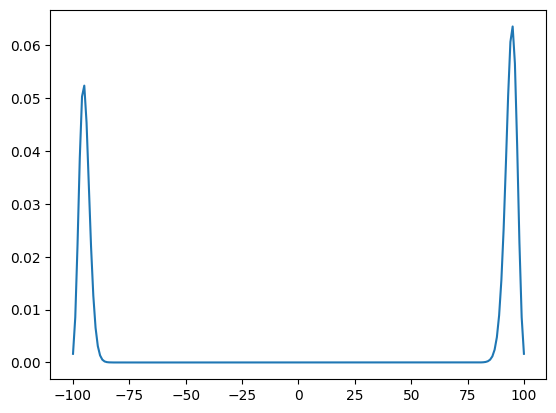

In [19]:
fig, ax = plt.subplots()
ax.plot(difs,probs)